## Setup

We'll start by importing a series of libraries we'll be using throughout the project.

In [30]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import plotly.express as px
import base64
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Load data and get basic summary statistics 

In [3]:
airbnb =  pd.read_csv('AB_NYC_2019.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Data Visualization

Use plotly express to get a pie chart of the neighbourhoods

In [6]:

fig = px.pie(airbnb_drop, names = 'neighbourhood_group', height = 700, width = 700)
fig.show()

Make a bar graph showing the number of reviews per Neighborhood group

In [13]:
#groupby the neighboorhood then count
neighborhood = airbnb.groupby(by = 'neighbourhood_group', dropna = True)['number_of_reviews'].sum()


#make bar chart, x will be in the index and y can be any of the columns since they all have the same count values 
barChart = px.bar(x = neighborhood.index, y = neighborhood.values, height = 700, width = 700)


# Update x and y axis names
barChart.update_xaxes(title_text='Neighborhood Group')
barChart.update_yaxes(title_text='Number of Reviews')

barChart.show()

Plot a scatter map of airbnbs in NYC

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


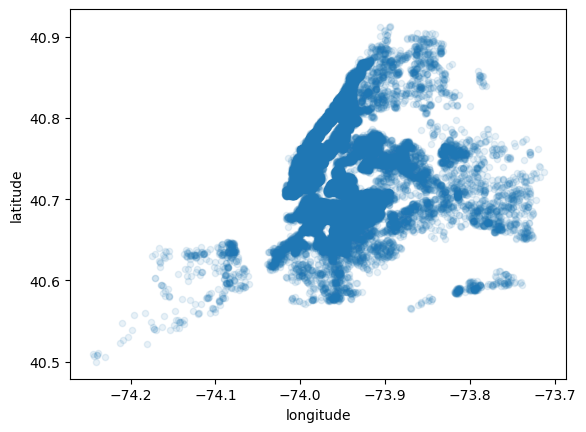

In [52]:
#first make a basic scatter plot of all the AirBnBs
airbnb.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
airbnb.head()


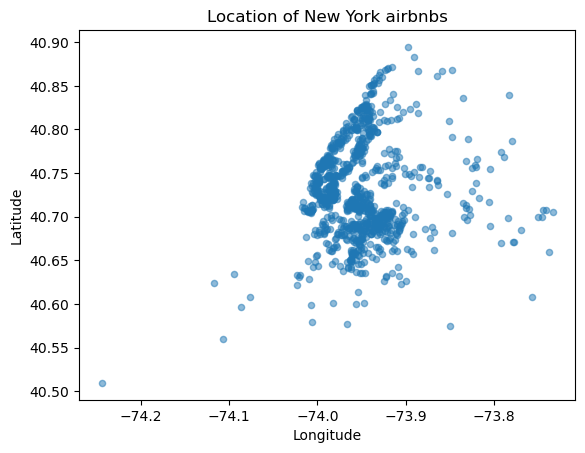

In [14]:
#to make a pretty graph take a sample of 1000 out of the airbnbs 
miniairbnb = airbnb.sample(n=1000, random_state = 2)

#plot the 1000 airbnbs
miniairbnb.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5)
plt.title("Location of New York airbnbs")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Plot a map of AirBnBs in NYC over an image of NYC. Color code by price

/var/folders/g0/f_p68hws5j31zw2939nbzg1m0000gn/T/ipykernel_5726/2686171668.py:23: UserWarning:

FixedFormatter should only be used together with FixedLocator



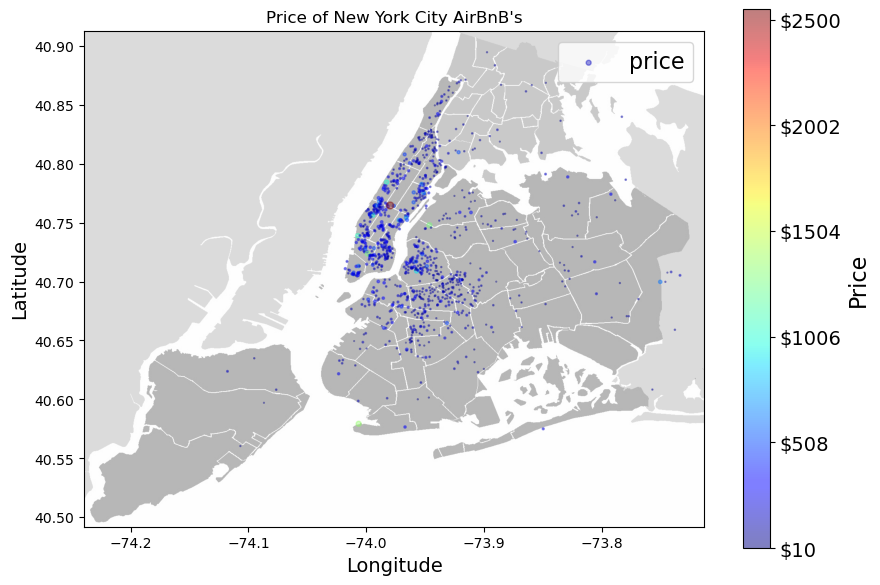

In [24]:
#Import image of NYC
nyc_img=mpimg.imread('nyc.png', -1)

#create scatter plot with the miniairbnb data
ax = miniairbnb.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7), s=miniairbnb['price']/100, label="price",c ='price', cmap=plt.get_cmap("jet"), colorbar=False, alpha=0.4, vmin=miniairbnb['price'].min())

#create image that is going to be overlayed 
plt.imshow(nyc_img, extent=[airbnb['longitude'].min() + 0.005, airbnb['longitude'].max(), airbnb['latitude'].min() - 0.008, airbnb['latitude'].max()], alpha=0.5, cmap=plt.get_cmap("jet"))

#create labels for the plot 
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('Price of New York City AirBnB\'s')

#make a colorbar 
#grab the price column to get values to use for tick markers
cost = miniairbnb["price"]

# This breaks it up into 6 tick values
tick_values = np.linspace(cost.min(), cost.max(),num =  6)
#make a colorbar
cb = plt.colorbar()
cb.ax.set_yticklabels(["$%d"%(round(v)) for v in tick_values], fontsize=14)
#set colorbar label
cb.set_label('Price', fontsize=16)

#make legend then show the plot 
plt.legend(fontsize=16)
plt.show()

Create the same plot as above using Plotly

In [31]:
#make a plotly scatter plot
fig = px.scatter(miniairbnb, x = 'longitude' , y = 'latitude', size = miniairbnb['price']/1000, color = 'price', color_continuous_scale= 'jet', title = 'Price of New York City AirBnB\'s', width = 700, height = 700)

#update x and y axis range so that it makes sense with the plot 
fig.update_xaxes(range = [airbnb['longitude'].min(), airbnb['longitude'].max()])
fig.update_yaxes(range = [airbnb['latitude'].min(), airbnb['latitude'].max()])

#update the colorbar ticks to be the correct price 
fig.update_layout(coloraxis_colorbar=dict(tickvals=tick_values,ticktext=["$%d" % (round(v)) for v in tick_values], title="Price"
))

#set a local image as a background
image_filename = 'nyc.png'
#get the nycmap in base64
plotly_logo = base64.b64encode(open(image_filename, 'rb').read())

#add the image to the map 
fig.update_layout(images=[dict(source='data:image/png;base64,{}'.format(plotly_logo.decode()), x=0, y=1, xref='paper', yref='paper', sizex = 1, sizey= 1, opacity=0.7, layer='below', xanchor = 'left', yanchor='top', sizing = 'stretch')])

#show the figure
fig.show()


Plot the average price of room types in Brooklyn who have at least 10 Reviews

In [34]:
#grab values that are in Brooklyn with at least 10 reviews 
subgroup = airbnb[(airbnb['neighbourhood_group'] == 'Brooklyn') & (airbnb['number_of_reviews'] >= 10)]
#get the mean price per room type, group everything by roomtype the take the mean price
tograph = subgroup.groupby(by = 'room_type')['price'].mean()
#graph and change labels
fig = px.bar(x = tograph.index , y = tograph.values, height = 700, width = 700)
fig.update_layout(xaxis_title = 'Type of Room', yaxis_title = 'Mean cost', title = 'Mean cost for NYC AirBnb Room Type')

fig.show()

## Prepare the Data

In [5]:
#drop columns with featuers we will not be using 
airbnb_drop = airbnb.drop(['name', 'host_id', 'host_name', 'last_review', 'neighbourhood'], axis = 1)

In [60]:
airbnb_drop.head()

,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### Feature Engineering

Let's create a new binned feature, `price_cat` that will divide our dataset into quintiles (1-5) in terms of price level (you can choose the levels to assign)

Do a value count to check the distribution of values

In [61]:
# assign each bin a categorical value [1, 2, 3, 4, 5] in this case.
#min price is 0 and max is 10000 but mean is 152
#bins will be 0-50, 51-100, 101-150, 151-200, 200+
#starting at -1 so that the value 0 gets put in a bin
airbnb_drop["price_cat"] = pd.cut(airbnb['price'], bins =[-1,50,100,150,200, 10000], labels = [1,2,3,4,5])

airbnb_drop["price_cat"].value_counts()

airbnb_drop.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48895 non-null  int64   
 1   neighbourhood_group             48895 non-null  object  
 2   latitude                        48895 non-null  float64 
 3   longitude                       48895 non-null  float64 
 4   room_type                       48895 non-null  object  
 5   price                           48895 non-null  int64   
 6   minimum_nights                  48895 non-null  int64   
 7   number_of_reviews               48895 non-null  int64   
 8   reviews_per_month               38843 non-null  float64 
 9   calculated_host_listings_count  48895 non-null  int64   
 10  availability_365                48895 non-null  int64   
 11  price_cat                       48895 non-null  category
dtypes: category(1), fl

### Data Imputation

Determine if there are any null-values and impute them.

In [62]:
airbnb_drop.info()
#checking shape to to see if there is any null values 
airbnb_drop.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48895 non-null  int64   
 1   neighbourhood_group             48895 non-null  object  
 2   latitude                        48895 non-null  float64 
 3   longitude                       48895 non-null  float64 
 4   room_type                       48895 non-null  object  
 5   price                           48895 non-null  int64   
 6   minimum_nights                  48895 non-null  int64   
 7   number_of_reviews               48895 non-null  int64   
 8   reviews_per_month               38843 non-null  float64 
 9   calculated_host_listings_count  48895 non-null  int64   
 10  availability_365                48895 non-null  int64   
 11  price_cat                       48895 non-null  category
dtypes: category(1), fl

(48895, 12)

In [63]:
# WRITE YOUR CODE HERE #
#there is null values in the reviews _per_month column as there are 48895 entries and this row does not have that many non-null values 
airbnb_drop['reviews_per_month'].fillna(airbnb_drop['reviews_per_month'].median(), inplace=True)
airbnb_drop.info()
airbnb_drop.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48895 non-null  int64   
 1   neighbourhood_group             48895 non-null  object  
 2   latitude                        48895 non-null  float64 
 3   longitude                       48895 non-null  float64 
 4   room_type                       48895 non-null  object  
 5   price                           48895 non-null  int64   
 6   minimum_nights                  48895 non-null  int64   
 7   number_of_reviews               48895 non-null  int64   
 8   reviews_per_month               48895 non-null  float64 
 9   calculated_host_listings_count  48895 non-null  int64   
 10  availability_365                48895 non-null  int64   
 11  price_cat                       48895 non-null  category
dtypes: category(1), fl

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.238930,7.143982,112.781327
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.520861,32.952519,131.622289
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Numeric Conversions

Finally, review what features in your dataset are non-numeric and convert them.

In [64]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# WRITE YOUR CODE HERE #

# creating instance of labelencoder
#apply this to the categorical data
labelencoder = LabelEncoder()
airbnb_drop['room_type'] = labelencoder.fit_transform(airbnb_drop['room_type'])

#create one hot encoder 
#use this for the non ordinal data which is neighborhood_group
onehotencoder = OneHotEncoder(sparse = False)
transformedNeighborhood = pd.DataFrame(onehotencoder.fit_transform(airbnb_drop['neighbourhood_group'].values.reshape(-1, 1)))
# Get the feature names from the OneHotEncoder and make them the column names
transformedNeighborhood.columns = onehotencoder.get_feature_names_out(['neighbourhood_group'])
moredropped = airbnb_drop.drop('neighbourhood_group', axis = 1)
airbnbfinal = pd.concat([moredropped, transformedNeighborhood], axis = 1)


airbnbfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   id                                 48895 non-null  int64   
 1   latitude                           48895 non-null  float64 
 2   longitude                          48895 non-null  float64 
 3   room_type                          48895 non-null  int64   
 4   price                              48895 non-null  int64   
 5   minimum_nights                     48895 non-null  int64   
 6   number_of_reviews                  48895 non-null  int64   
 7   reviews_per_month                  48895 non-null  float64 
 8   calculated_host_listings_count     48895 non-null  int64   
 9   availability_365                   48895 non-null  int64   
 10  price_cat                          48895 non-null  category
 11  neighbourhood_group_Bronx          48895 

/Users/avagonick/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



# Prepare Data for Machine Learning

Using our `StratifiedShuffleSplit` function example from above, let's split our data into a 80/20 Training/Testing split using `price_cat` to partition the dataset

In [65]:
from sklearn.model_selection import StratifiedShuffleSplit
# let's first start by creating our train and test sets

# WRITE YOUR CODE HERE #
#create training and testing data to be used for the data 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(airbnbfinal, airbnbfinal["price_cat"]):
    train_set = airbnbfinal.loc[train_index]
    test_set = airbnbfinal.loc[test_index]

In [66]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9779 entries, 40006 to 29290
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   id                                 9779 non-null   int64   
 1   latitude                           9779 non-null   float64 
 2   longitude                          9779 non-null   float64 
 3   room_type                          9779 non-null   int64   
 4   price                              9779 non-null   int64   
 5   minimum_nights                     9779 non-null   int64   
 6   number_of_reviews                  9779 non-null   int64   
 7   reviews_per_month                  9779 non-null   float64 
 8   calculated_host_listings_count     9779 non-null   int64   
 9   availability_365                   9779 non-null   int64   
 10  price_cat                          9779 non-null   category
 11  neighbourhood_group_Bronx          9779 non

Finally, remove your labels `price` and `price_cat` from your testing and training cohorts, and create separate label features.

In [67]:
# WRITE YOUR CODE HERE #
#set training data and get rid of labels,(need to get rid of price_cat because it holds info about the labels)
training = train_set.drop(['price', 'price_cat'], axis=1) # drop labels for training set features  
#set taining data labels, set one for price                                        
airbnb_labels_price_train = train_set["price"].copy()


#set test data and get rid of labels 
test = test_set.drop(['price', 'price_cat'], axis=1) # drop labels for training set features  
#set taining data labels, set one for price and one for price_cat                                          
airbnb_labels_price_test = test_set["price"].copy()

In [68]:
training.head()

,id,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
8386,6449002,40.72846,-74.00113,0,3,2,0.04,1,0,0.0,0.0,1.0,0.0,0.0
29170,22392030,40.77506,-73.98162,0,15,0,0.72,1,0,0.0,0.0,1.0,0.0,0.0
32635,25639737,40.76362,-73.98546,1,1,40,3.05,5,346,0.0,0.0,1.0,0.0,0.0
20275,16212477,40.63501,-73.97298,1,1,1,0.03,1,0,0.0,1.0,0.0,0.0,0.0
26068,20799506,40.75713,-73.91334,1,3,1,0.05,2,328,0.0,0.0,0.0,1.0,0.0


# Fit a linear regression model

The task is to predict the price, you could refer to the housing example on how to train and evaluate your model using **MSE**.
Provide both **test and train set MSE values**.

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#we are going to test and train MSE values also try it using the labels price cat and price? 
LinearReg = LinearRegression()

#train/fit the training data
LinearReg.fit(training, airbnb_labels_price_train)

#predict the training data
predictTrain = LinearReg.predict(training)

#get the mean squared error of the training data
mseTrain = mean_squared_error(airbnb_labels_price_train, predictTrain)
print(mseTrain)

#now predict on the testing data
predictTest = LinearReg.predict(test)

#get the mean squared error of the testing data
mseTest = mean_squared_error(airbnb_labels_price_test, predictTest)
print(mseTest)

#the mse of the testing data is higher than that of my training data suggesting overfitting in the model


56278.255995147236
35376.02186382585
